# Submetric - Courts

Having a communities without courts and fields to play sports on is just a bummer. That's why we decided it was only right to measure a variety of courts from basketball courts to tennis courts. With a variety of activities, the community is always fun.

## Metric

Since there are variety of combinations of courts a neighborhood can have, there are so many ways you could evaluate the datasets of courts. We decided on measuring the diversification of courts, the frequency of courts, and the number of full basketball courts (as they are the most popular type of court). We combined these values by averaging them to determine the neighborhood with the most fun. 

## Analysis

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gp

### Import dataset:

In [2]:
#read in files
courts = pd.read_csv("courts&rinks.csv")
courts.head(100)

,id,name,type,park,location,surface_material,grandstand,inactive,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1592343416,Allegheny Commons Basketball Court 1,Basketball (Full),Allegheny Commons,NaN,NaN,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.454443,-80.008104
1,1365248699,Allegheny Commons Park Tennis Court 1,Tennis,Allegheny Commons,NaN,Asphalt,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.452400,-80.012531
2,1757180821,Allegheny Commons Park Tennis Court 2,Tennis,Allegheny Commons,NaN,Asphalt,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.452238,-80.012150
3,744303307,Allegheny Commons Park Tennis Court 3,Tennis,Allegheny Commons,NaN,Asphalt,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.452075,-80.011767
4,1157777481,Alton Park Basketball Court 1,Basketball (Half),Alton Park,NaN,Asphalt,0,f,Beechview,4,19,42003191600,5,19,6,4-28,40.414152,-80.022305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1271269929,Highland Park Flynn Parklet Basketball Court 1,Basketball (Half),Highland Park,NaN,Asphalt,0,f,Highland Park,7,11,42003110200,2,11,5,3-9,40.478829,-79.918815
96,63568209,Highland Park Flynn Parklet Basketball Court 2,Basketball (Half),Highland Park,NaN,Asphalt,0,f,Highland Park,7,11,42003110200,2,11,5,3-9,40.478763,-79.918631
97,1563856270,Highland Park Flynn Parklet Hockey Court 1,Street Hockey,Highland Park,NaN,Asphalt,0,f,Highland Park,7,11,42003110200,2,11,5,3-9,40.478650,-79.918818
98,396643617,Highland Park Flynn Parklet Tennis Court 1,Tennis,Highland Park,NaN,Asphalt,0,f,Highland Park,7,11,42003110200,2,11,5,3-9,40.479078,-79.918682


Creating bar plot of court frequency:

In [3]:
occurenceOfCourtType = courts.groupby(['type']).size().sort_values(ascending=True)

display(occurenceOfCourtType)

type
Horseshoe Pit         2
Lawn Bowling          2
Dek Hockey            5
Volleyball            5
General Sports        6
Bocce                 8
Street Hockey         8
Pickleball           12
Hockey               14
Basketball (Half)    23
Tennis               73
Basketball (Full)    88
dtype: int64

Full Basketball courts are the most frequent in neighborhoods

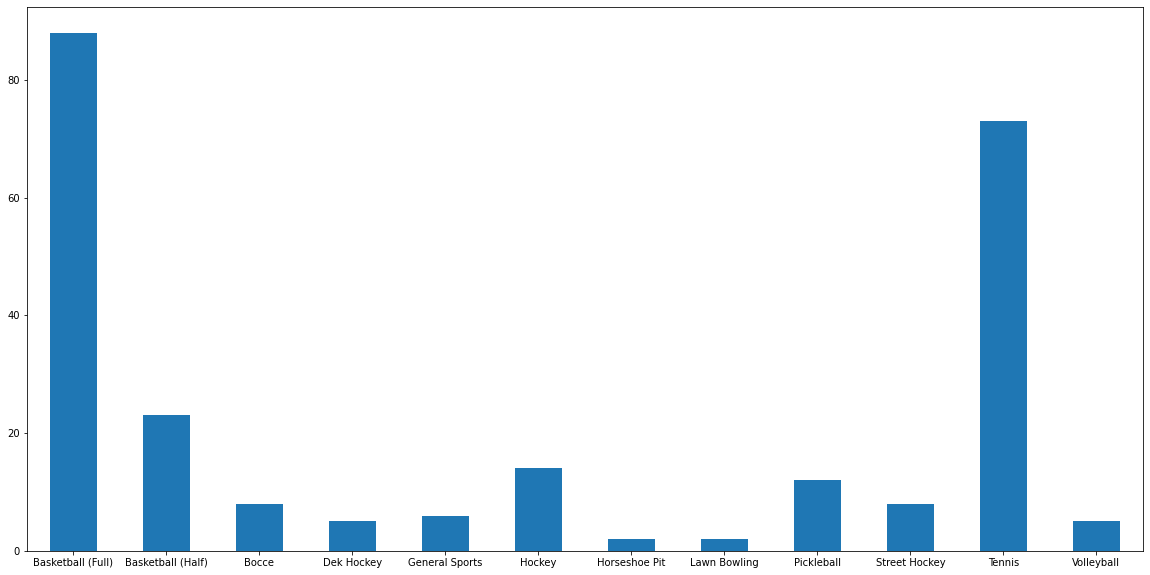

In [4]:
courts["type"].value_counts().sort_index().plot(kind='bar', rot=0, figsize = (20, 10))

Basketball (Full) is the most built court so it is probably also the most popular among users.

Now we create a totally new dataframe examining only neighborhoods and the specific types of courts to analyze diversity of courts.

In [5]:
df_new = courts[['neighborhood', 'type']]
df_new

,neighborhood,type
0,Allegheny Center,Basketball (Full)
1,Allegheny Center,Tennis
2,Allegheny Center,Tennis
3,Allegheny Center,Tennis
4,Beechview,Basketball (Half)
...,...,...
241,Perry North,Tennis
242,Elliott,Basketball (Half)
243,Squirrel Hill South,Pickleball
244,Squirrel Hill South,Pickleball


Figure out how many unique courts there are:

In [6]:
df_new.groupby("type").nunique().count()

neighborhood    12
dtype: int64

Analyze which neighborhood has the most unique courts.

In [7]:
df_new.groupby("neighborhood")['type'].nunique().sort_values(ascending=True)

neighborhood
Lincoln-Lemington-Belmar    1
Homewood West               1
Larimer                     1
Marshall-Shadeland          1
Middle Hill                 1
                           ..
Hazelwood                   4
Allegheny Center            4
Brookline                   5
Highland Park               5
Squirrel Hill South         6
Name: type, Length: 63, dtype: int64

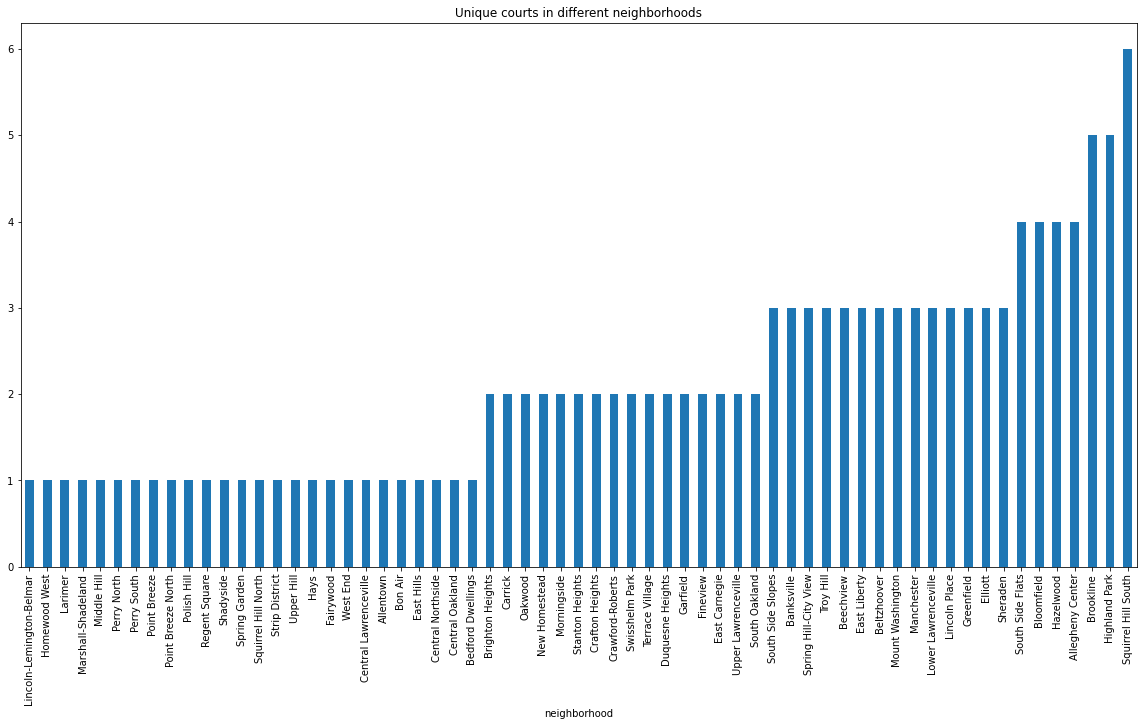

In [8]:
UNIQUE = df_new.groupby("neighborhood")['type'].nunique().sort_values(ascending=True)
UNIQUE.plot(kind='bar', figsize = (20, 10), title='Unique courts in different neighborhoods')

Conclusion: Squirrel Hill South has the most unique courts.

Determine frequency of courts:

In [9]:
FREQUENCY = df_new.groupby("neighborhood")['type'].count().sort_values(ascending=True)
FREQUENCY


neighborhood
Polish Hill             1
Larimer                 1
Marshall-Shadeland      1
Middle Hill             1
Perry South             1
                       ..
Brookline               9
Beltzhoover             9
Hazelwood              10
Highland Park          20
Squirrel Hill South    26
Name: type, Length: 63, dtype: int64

Plot frequency and diversity of courts:

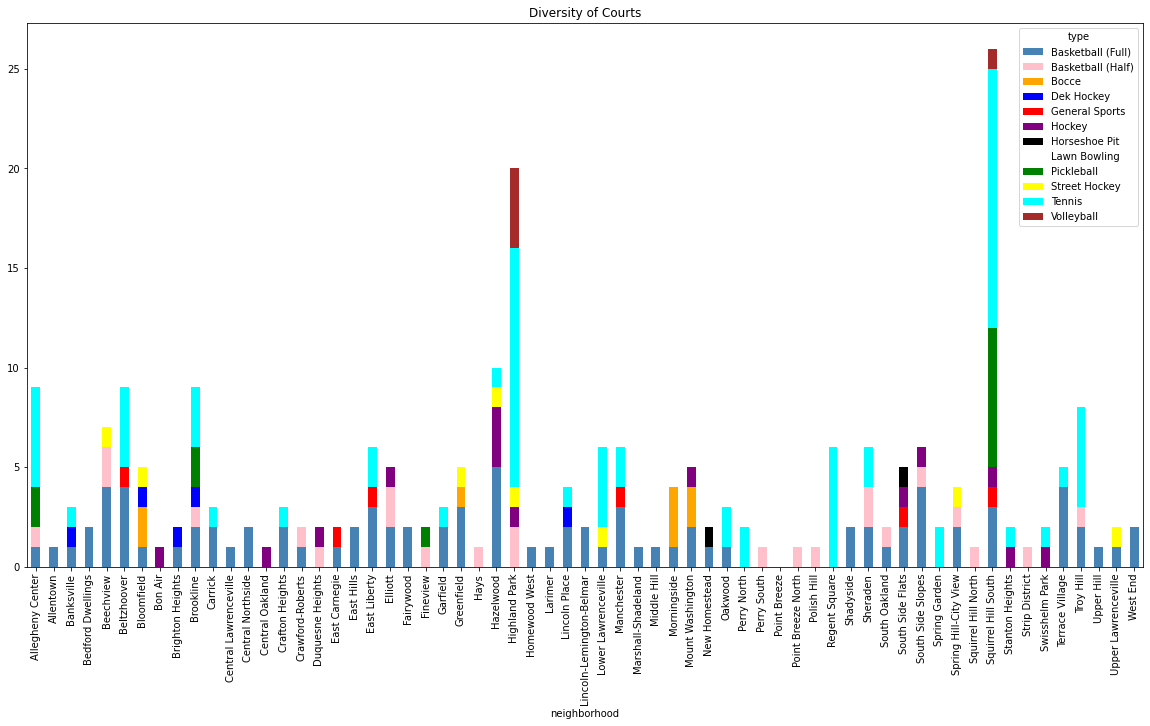

In [10]:
df_new.groupby(['neighborhood', 'type']).size().unstack().plot(kind='bar', stacked=True, rot=90, figsize = (20, 10), color=['steelblue','pink','orange','blue','red','purple','black','w','green','yellow','cyan','brown'], title='Diversity of Courts')


Squirrel Hill South is the best neighborhood for outdoor fun.

In [11]:
bbfcourts = df_new.loc[df_new['type']=='Basketball (Full)']
FULL_BB_COURTS = bbfcourts.groupby("neighborhood").count().sort_values(ascending=True, by='type')
FULL_BB_COURTS

,type
neighborhood,
Allegheny Center,1
Upper Hill,1
South Oakland,1
Oakwood,1
New Homestead,1
Morningside,1
Middle Hill,1
Marshall-Shadeland,1
Lower Lawrenceville,1


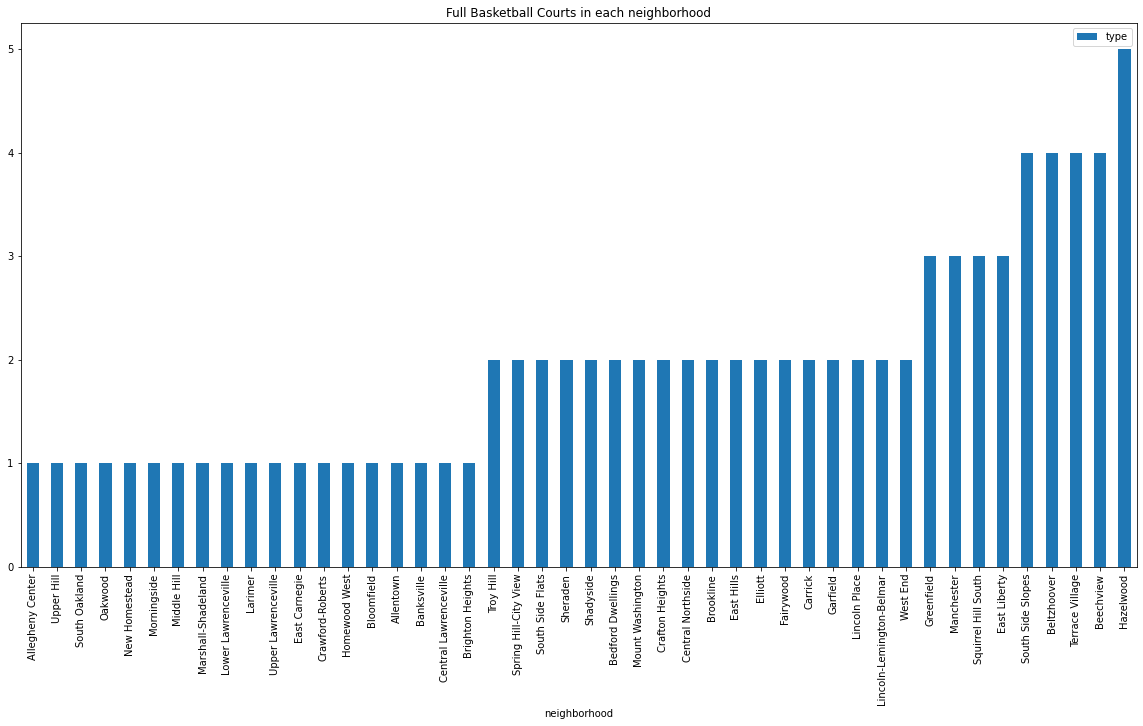

In [12]:
FULL_BB_COURTS.plot(kind='bar', figsize = (20, 10), title="Full Basketball Courts in each neighborhood")

In [14]:
metric = pd.concat([UNIQUE, FREQUENCY, FULL_BB_COURTS], axis=1).sum(axis=1).divide(3)
metric

neighborhood
Lincoln-Lemington-Belmar     1.666667
Homewood West                1.000000
Larimer                      1.000000
Marshall-Shadeland           1.000000
Middle Hill                  1.000000
                              ...    
Hazelwood                    6.333333
Allegheny Center             4.666667
Brookline                    5.333333
Highland Park                8.333333
Squirrel Hill South         11.666667
Length: 63, dtype: float64

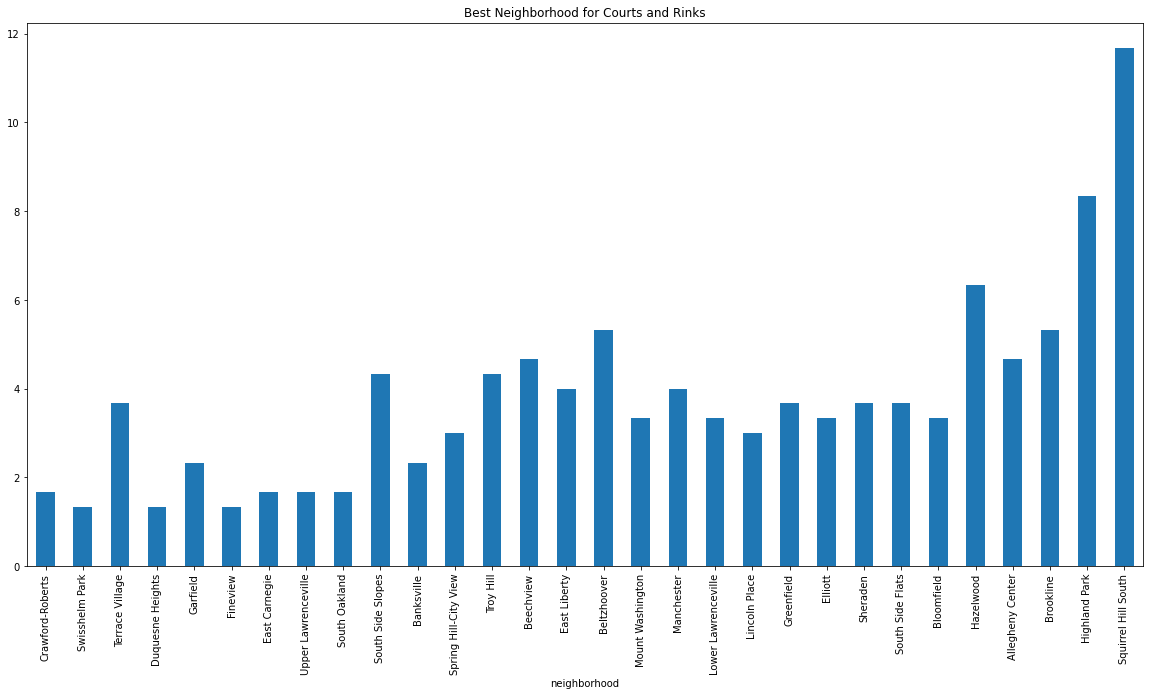

In [15]:
metric.tail(30).plot.bar(figsize=(20,10), title="Best Neighborhood for Courts and Rinks")

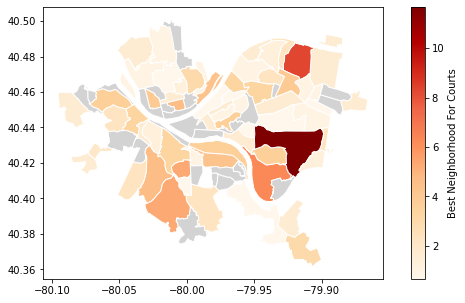

In [16]:
# Import neighborhood geometry data
neighborhoods = gp.read_file("Neighborhoods/Neighborhoods_.shp")

# merge our metric data with the geometry
metric = neighborhoods.merge(metric.rename("metric"),  how='left', left_on='hood', right_on='neighborhood')

# plot a map, name is the metric #
metric.plot(column="metric",
            cmap='OrRd',              
               edgecolor="white",        
               legend=True,              
               legend_kwds={'label': "Best Neighborhood For Courts"}, 
               figsize=(10, 5),         
               missing_kwds={"color": "lightgrey"} 
           )